# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Charles
- **Email:** leecharles565@gmail.com
- **ID Dicoding:** charles_lee_HWKT

## Menentukan Pertanyaan Bisnis

- Bagaimana pembagian customer berdasarkan state?
- Bagaimana performa penjualan dari bulan ke bulan?
- Kategori produk mana yang memiliki paling banyak penghasilan dan yang mana memiliki penghasilan paling sedikit?
- Kategori produk mana yang paling banyak terjual dan produk mana yang paling sedikit terjual?


## Import Semua Packages/Library yang Digunakan

In [ ]:
# Library untuk melakukan data analysis serta visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk download dan extract dataset
import gdown
import os
import zipfile

## Data Wrangling

### Gathering Data

#### Download and Extract Dataset

In [132]:
# Download dataset

download_link = f'https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK'
output = 'eccomerce_dataset.zip'
gdown.download(download_link, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=974208c0-a7b6-4033-8efc-9e34ea45c2d9
To: /content/eccomerce_dataset.zip
100%|██████████| 44.9M/44.9M [00:00<00:00, 83.7MB/s]


'eccomerce_dataset.zip'

In [133]:
# Menggunakan zipfile untuk extract dataset

# Path extract ke current direktori
zip_path = 'eccomerce_dataset.zip'
extract_path = '/content/'

# Melakukan unzipping file
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List konten di direktori

os.listdir(extract_path)

['.config',
 'eccomerce_dataset.zip',
 'all_data.csv',
 'E-Commerce Public Dataset',
 'sample_data']

In [134]:
# Cek isi file di dalam dataset

os.listdir('E-Commerce Public Dataset')

['products_dataset.csv',
 'orders_dataset.csv',
 'product_category_name_translation.csv',
 'geolocation_dataset.csv',
 'customers_dataset.csv',
 'New Text Document.txt',
 'order_payments_dataset.csv',
 'sellers_dataset.csv',
 'order_items_dataset.csv',
 'order_reviews_dataset.csv']

#### Assign Each Dataset to A Dataframe

In [135]:
# Dataset Customers
customers_df = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [136]:
# Dataset Product Category
product_category_df = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [137]:
# Dataset Geolocation
geolocation_df = pd.read_csv("E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [138]:
# Dataset Orders
orders_df = pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [139]:
# Dataset Order Items
order_items_df = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [140]:
# Dataset Order Review
order_reviews_df = pd.read_csv("E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [141]:
# Dataset Sellers
sellers_df = pd.read_csv("E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [142]:
# Dataset Order Payments
order_payments_df = pd.read_csv("E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [143]:
# Dataset Products
products_df = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

#### Menilai tabel `customers_df`

In [144]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [145]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [146]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [147]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Bisa dilihat bahwa `customers_df` tidak memiliki data duplikasi

#### Menilai tabel `product_category_df`

In [148]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [149]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [150]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [151]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


`product_category_df` tidak memiliki duplikasi data

#### Menilai tabel `geolocation_df`

In [152]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [153]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [154]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [155]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


terdapat duplikasi pada `geolocation_df`

#### Menilai tabel `orders_df`

In [156]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Dari hasil info tersebut, bisa dilihat bahwa ada 3 kolom yang memiliki data tidak penuh, yakni kolom `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`

In [157]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [158]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [159]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


`orders_df` memiliki null value



#### Menilai tabel `order_items_df`

In [160]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [161]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [162]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [163]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


`order_items_df` tidak memiliki data duplikasi dan null value

#### Menilai tabel `order_reviews_df`

In [164]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat null value di bagian `review_comment_title` dan `review_comment_message` tapi karena ini E-Commerce, bisa diasumsikan bahwa review tidak diwajibkan, sehingga null value merupakan hal wajar

In [165]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [166]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [167]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


`order_reviews_df` memiliki null value yang wajar pada bagian review

#### Menilai tabel `sellers_df`

In [168]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [169]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [170]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [171]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


`sellers_df` tidak memiliki null value dan duplikat

#### Menilai tabel `order_payments_df`

In [172]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [173]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [174]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [175]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


`order_payments_df` tidak memiliki null value dan duplikat

#### Menilai tabel `products_df`

In [176]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [177]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat beberapa null value pada `products_df`

In [178]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [179]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


`products_df` memiliki beberapa nama dan deskripsi kosong


### Cleaning Data



#### Membersihkan tabel `orders_df`

##### Memperbaiki tipe data

In [180]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Dari info tersebut ada kolom date yang memiliki tipe data object, sehingga harus diubah terlebih dahulu.

In [181]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

Dari data di atas bisa kita lihat tidak semua order sudah di deliver, sehingga data delivered bisa saja null

In [182]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

#### Membersihkan tabel `order_reviews_df`

##### Menghapus kolom `review_comment_title` dan `review_comment_message` karena tidak akan digunakan

In [183]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [184]:
order_reviews_df.drop('review_comment_title', axis=1, inplace=True)
order_reviews_df.drop('review_comment_message', axis=1, inplace=True)

In [185]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


##### Memperbaiki tipe data

In [186]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [187]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [188]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


#### Membersihkan tabel `products_df`

Mengatasi missing value

In [189]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [190]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Dikarenakan missing value tersebut mencakup category name dan name, kita bisa menghapus saja product tersebut sekaligus karena jika tidak ada nama tidak akan bisa kita gunaakn

In [191]:
products_df.dropna(inplace=True)

In [192]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [193]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
63702,3dac9e1a5661fc3cd58ef484a1aa98a2,039dbe7ecc24f88273182692f51ea405,90420,porto alegre,RS
69303,a0e89f9dfbebeadd73de6bb72471decf,984fd675c074cd34f649e41cc5315749,77760,colinas do tocantins,TO
47624,5949e53fa3ca207aab85533fd2175123,f2a20646a87c3fa18a908370905a7f94,29480,muqui,ES
79810,225039e285ca2f82f0f22d0ccfda23e3,39c4907fcf597bfa171ee83c76b48ef3,29018,vitoria,ES
61532,2e2534a17bfa1b56a16d51f7514c5370,54ebc03b7f24d848631e57095011ef22,14170,sertaozinho,SP


In [194]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [195]:
customers_df.customer_id.is_unique

True

In [196]:
duplicates_mask = customers_df.customer_id.duplicated(keep='first')
duplicated_rows = customers_df[duplicates_mask]
print(duplicated_rows)

Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []


In [197]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [198]:
# Group customer berdasarkan state
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore `orders_df`

In [199]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
34588,c713f1fadf9be09f8f37e21eddce6a3f,0a7a01c85394193b60b4edea15964d7a,delivered,2018-08-16 11:00:28,2018-08-16 11:15:16,2018-08-16 12:58:00,2018-08-24 13:43:23,2018-08-31
691,9f2ff91a3b8c4c34b7847c9c68971cfd,623438e09482cf7300ffdf9b95ffd9dd,delivered,2018-08-24 09:55:31,2018-08-24 10:10:20,2018-08-27 17:58:00,2018-08-28 16:12:10,2018-08-30
61884,249a42ab6064b9a21179bf1ba421b69c,b8eba1e020001de17365343570154fbd,delivered,2018-04-11 16:09:44,2018-04-11 16:32:06,2018-04-12 20:36:25,2018-04-13 21:05:52,2018-04-23
16638,ad1aeeb1a99c9f021e38a49865bb812c,6deeb4ffef6cf320ef5a642302f04104,delivered,2016-10-05 12:41:38,2016-10-07 02:49:06,2016-10-21 16:23:50,2016-10-26 13:31:53,2016-12-09
39534,5057598da256a7629c0f6f21877215ba,16c2b0a5ce42533979d3f8150e1298c5,invoiced,2018-07-11 09:23:23,2018-07-11 09:30:30,NaT,NaT,2018-08-08


In [200]:
# Cari delivery time dalam hari
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [201]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
61127,2ed2aef2fa258dd0d58efbaf2eba622a,2baf7b990d434514d27a86ea5bca2864,delivered,2018-06-21 21:51:36,2018-06-21 22:18:00,2018-06-22 11:10:00,2018-06-28 21:11:11,2018-07-18,6.0
28701,d17af0e622acc56678df36ccb59c171a,33615d52f0c92e6958cc42155ec4f68b,delivered,2017-09-30 00:44:35,2017-09-30 00:56:15,2017-10-02 20:32:19,2017-10-03 20:43:58,2017-10-19,1.0
85373,e0ff4f042465bf3a83ab05b537d1c90e,35ccaf85cd6559f85e62b1968fa763b0,delivered,2018-05-28 19:57:32,2018-05-28 20:10:23,2018-06-01 11:20:00,2018-06-06 16:38:37,2018-06-28,5.0
39139,acb56e6695d371a1c50a34c38938277e,29457f76418b2b673b5c36b6aefbb6b5,delivered,2017-11-27 18:04:28,2017-11-27 18:14:20,2017-11-29 00:54:43,2017-12-12 22:37:03,2017-12-15,14.0
53786,71c903bedef48954734ef47b8a9be312,a798f977cebe547066d7d5beea1b4268,delivered,2018-02-22 08:08:16,2018-02-22 08:48:10,2018-02-24 03:19:13,2018-02-26 16:34:00,2018-03-08,3.0


<Axes: >

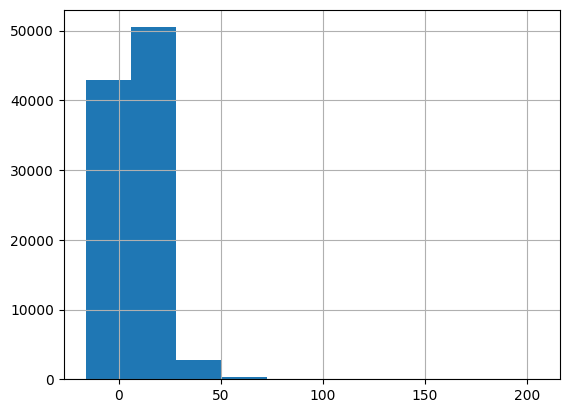

In [202]:
orders_df.delivery_time.hist()

<Axes: >

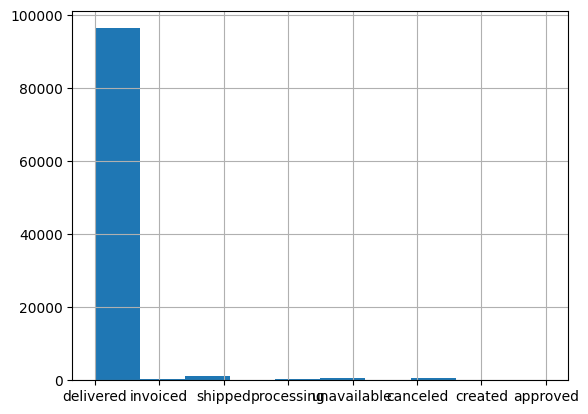

In [203]:
# Cek pembagian berdasarkan order status
orders_df.order_status.hist()

In [204]:
# Bagi per bulan
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_month
96035,cfebb97f36814d6f42de3df1e03d0210,21bdd767d991e3dc7efdb6149f1e6c5e,delivered,2018-07-26 19:47:29,2018-07-26 20:24:09,2018-08-01 16:27:00,2018-08-03 16:56:37,2018-08-17,2.0,2018-07
52917,16d5fdc844fab7f0554c804c1f10a8aa,f33f9f2a36cac5e766d02a234f97dc28,delivered,2018-04-07 19:32:15,2018-04-07 19:48:08,2018-04-09 20:08:46,2018-04-18 20:50:52,2018-04-30,9.0,2018-04
56920,bee3bdf96f440b4049e95e8eb6f64dc0,357bce4410edc8454d9c1448f5664305,delivered,2018-01-29 19:05:28,2018-01-29 19:15:32,2018-01-30 18:24:04,2018-02-08 17:28:28,2018-02-20,9.0,2018-01
31465,789ef8e547844763c96f5e815b5478e3,8a71eb0a0092b48c6cf685f059bf0940,delivered,2018-07-12 08:47:25,2018-07-13 08:45:15,2018-07-23 15:08:00,2018-08-06 19:08:46,2018-08-22,14.0,2018-07
34773,6b7c51889439d1226b105ac94db9688d,80d559f43415392b923172d3a7137c60,delivered,2018-07-08 21:38:25,2018-07-08 21:50:11,2018-07-13 13:38:00,2018-07-23 21:32:23,2018-07-31,10.0,2018-07


In [205]:
# Group data berdasarkan total pesanan per bulan
monthly_orders = orders_df.groupby('order_month')['order_id'].count().reset_index()
print(monthly_orders)

   order_month  order_id
0      2016-09         4
1      2016-10       324
2      2016-12         1
3      2017-01       800
4      2017-02      1780
5      2017-03      2682
6      2017-04      2404
7      2017-05      3700
8      2017-06      3245
9      2017-07      4026
10     2017-08      4331
11     2017-09      4285
12     2017-10      4631
13     2017-11      7544
14     2017-12      5673
15     2018-01      7269
16     2018-02      6728
17     2018-03      7211
18     2018-04      6939
19     2018-05      6873
20     2018-06      6167
21     2018-07      6292
22     2018-08      6512
23     2018-09        16
24     2018-10         4


### Explore `orders_df` and `order_items_df` and `products_df`

In [206]:
# Join dengan inner join karena jika tidak ada item kita abaikan
order_join_item_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
order_join_item_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,2018-08,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [207]:
order_join_item_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   delivery_time                  110195 non-null  float64       
 9   order_month                    112650 non-null  period[M]     
 10  order_item_id                  112650 non-null  int64         
 11  

In [208]:
# Join lagi dengan product_df untuk dapat nama product
order_product_df = pd.merge(
    left=order_join_item_df,
    right=products_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
order_product_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_month,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,2017-10,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,2017-08,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,3.0,2017-08,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,11.0,2017-10,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,2018-07,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0


In [209]:
# Join lagi dengan product_category_df untuk dapat name english
order_product_english_df = pd.merge(
    left=order_product_df,
    right=product_category_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)
order_product_english_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_month,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,2017-10,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,2017-08,...,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,3.0,2017-08,...,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,11.0,2017-10,...,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,15.0,2017-11,...,17.12,utilidades_domesticas,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares


In [210]:
# List produk berdasarkan jumlah penghasilan

order_product_english_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,price
product_category_name_english,,
health_beauty,8836,1258681.34
watches_gifts,5624,1205005.68
bed_bath_table,9417,1036988.68
sports_leisure,7720,988048.97
computers_accessories,6689,911954.32
...,...,...
flowers,29,1110.04
home_comfort_2,24,760.27
cds_dvds_musicals,12,730.00


In [211]:
# List produk berdasarkan jumlah order

order_product_english_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="order_id", ascending=False)

,order_id,price
product_category_name_english,,
bed_bath_table,9417,1036988.68
health_beauty,8836,1258681.34
sports_leisure,7720,988048.97
computers_accessories,6689,911954.32
furniture_decor,6449,729762.49
...,...,...
arts_and_craftmanship,23,1814.01
la_cuisine,13,2054.99
cds_dvds_musicals,12,730.00


### Buat `all_df`

In [212]:
# Join customers_df agar state bisa dicari menggunakan 1 csv aja nanti di dashboard
all_df = pd.merge(
    left=order_product_english_df,
    right=customers_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111022 entries, 0 to 111021
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111022 non-null  object        
 1   customer_id                    111022 non-null  object        
 2   order_status                   111022 non-null  object        
 3   order_purchase_timestamp       111022 non-null  datetime64[ns]
 4   order_approved_at              111008 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109867 non-null  datetime64[ns]
 6   order_delivered_customer_date  108636 non-null  datetime64[ns]
 7   order_estimated_delivery_date  111022 non-null  datetime64[ns]
 8   delivery_time                  108635 non-null  float64       
 9   order_month                    111022 non-null  period[M]     
 10  order_item_id                  111022 non-null  int64         
 11  

In [213]:
# Output to CSV
all_df.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

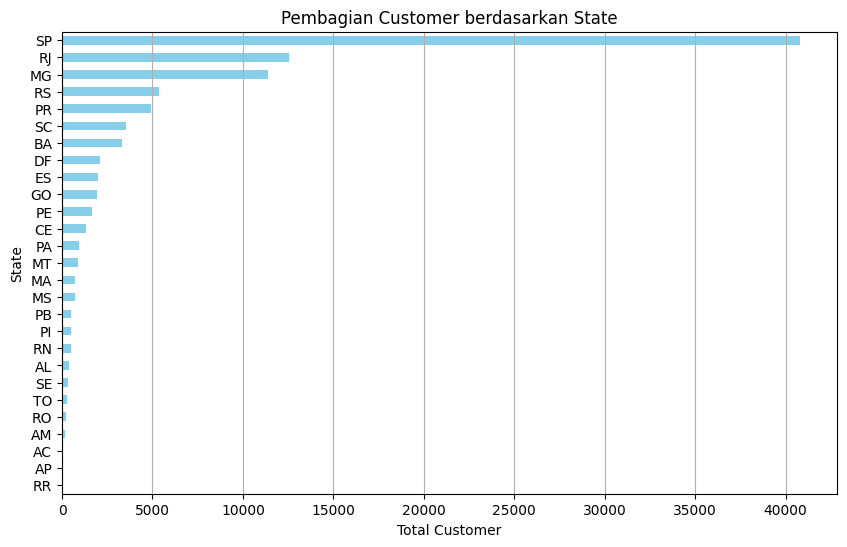

In [214]:
# Pembagian customer
state_df = all_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=True)

# Plotting menggunakan horizontal chart
plt.figure(figsize=(10, 6))
state_df.plot(kind='barh', color='skyblue')

# Tambah label dan judul
plt.xlabel('Total Customer')
plt.ylabel('State')
plt.title('Pembagian Customer berdasarkan State')

# Menampilkan Plot
plt.grid(axis='x')
plt.show()

<ipython-input-215-1707199caa53>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-215-1707199caa53>:13: UserWarning: 
The palette list has fewer values (1) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


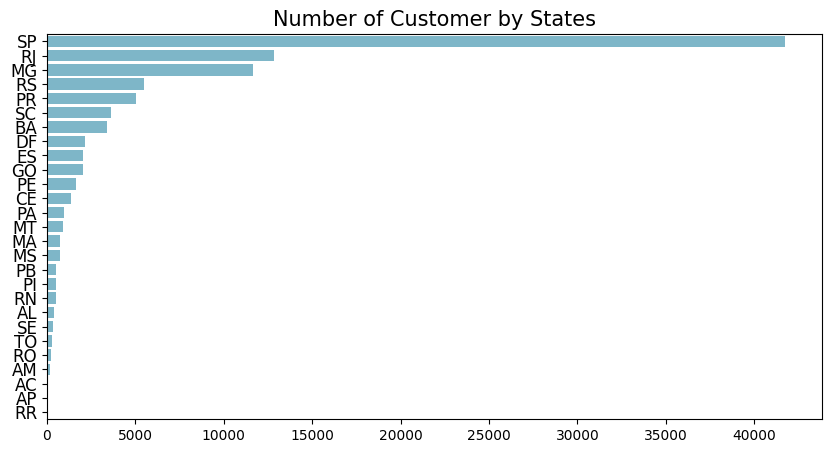

In [215]:
# Coba Menggunakan SNS dari dicoding

bystate_df = customers_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
})

bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Bisa dilihat di SP (Sau Paulo) terdapat banyak sekali customer

### Pertanyaan 2:

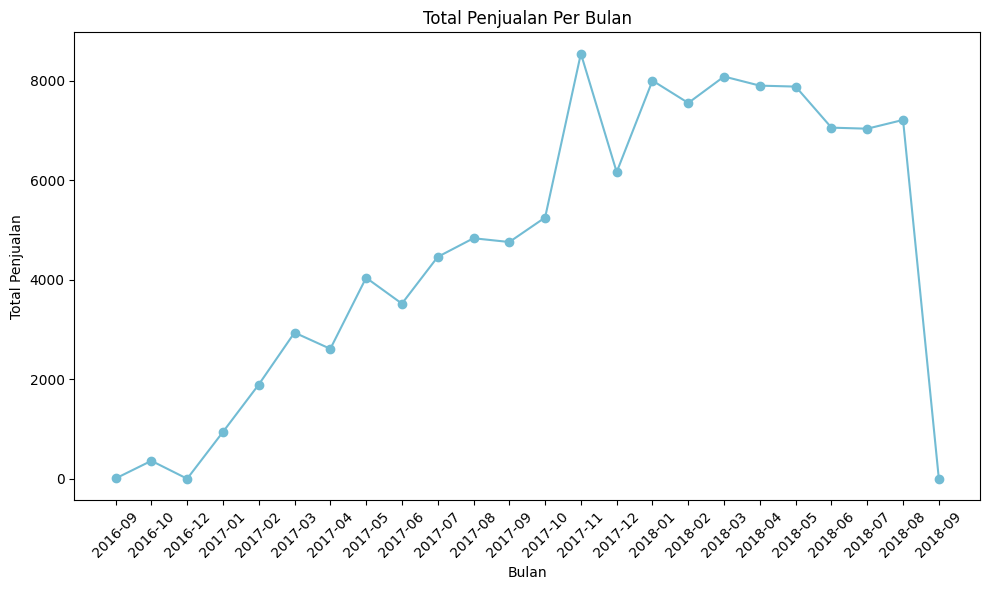

In [216]:
plt.figure(figsize=(10, 6))

# Konversi monthly order ke string
monthly_orders_df = all_df.groupby('order_month')['order_id'].count().reset_index()
monthly_orders_df['order_month_str'] = monthly_orders_df['order_month'].astype(str)

# Plot chart
plt.plot(monthly_orders_df['order_month_str'], monthly_orders_df['order_id'], marker='o', linestyle='-', color="#72BCD4")

# Tambah label dan judul
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan Per Bulan')

# Menampilkan Plot
plt.xticks(rotation=45)  # Putar X axis agar label tidak tabrakan

plt.tight_layout()  # Agar layout lebih rapi
plt.show()


### Pertanyaan 3:

In [232]:
result_order_product_highest = all_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)
result_order_product_highest = result_order_product_highest.head(5)
print(result_order_product_highest)


                               order_id       price
product_category_name_english                      
health_beauty                      8836  1258681.34
watches_gifts                      5624  1205005.68
bed_bath_table                     9417  1036988.68
sports_leisure                     7720   988048.97
computers_accessories              6689   911954.32


<Figure size 2000x600 with 0 Axes>

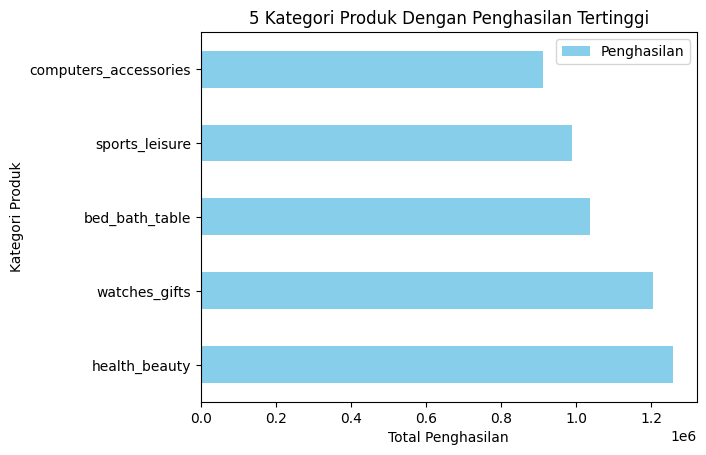

In [231]:
plt.figure(figsize=(20, 6))

# Plot chart

plot_highest = result_order_product_highest.plot(kind='barh', y='price', color='skyblue', legend=False)

# Tambah label dan judul
plt.xlabel('Total Penghasilan')
plt.ylabel('Kategori Produk')
plt.title('5 Kategori Produk Dengan Penghasilan Tertinggi')
plot_highest.legend(["Penghasilan"], loc="upper right")

# Menampilkan Plot
plt.show()

In [219]:
result_order_product_lowest = all_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=True)
result_order_product_lowest = result_order_product_lowest.head(5)
print(result_order_product_lowest)


                               order_id    price
product_category_name_english                   
security_and_services                 2   283.29
fashion_childrens_clothes             8   569.85
cds_dvds_musicals                    12   730.00
home_comfort_2                       24   760.27
flowers                              29  1110.04


<Figure size 2500x600 with 0 Axes>

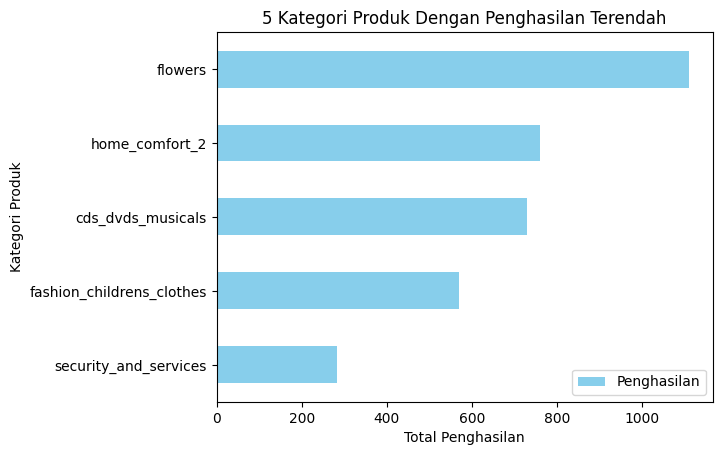

In [225]:
plt.figure(figsize=(25, 6))

# Plot chart
plot_lowest = result_order_product_lowest.plot(kind='barh', y='price', color='skyblue', legend=False)

# Tambah label dan judul
plt.xlabel('Total Penghasilan')
plt.ylabel('Kategori Produk')
plt.title('5 Kategori Produk Dengan Penghasilan Terendah')
plot_lowest.legend(["Penghasilan"], loc="lower right")

# Menampilkan Plot
plt.show()

### Pertanyaan 4:

In [221]:
result_order_product_highest_order = all_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="order_id", ascending=False)
result_order_product_highest_order = result_order_product_highest_order.head(5)
print(result_order_product_highest_order)


                               order_id       price
product_category_name_english                      
bed_bath_table                     9417  1036988.68
health_beauty                      8836  1258681.34
sports_leisure                     7720   988048.97
computers_accessories              6689   911954.32
furniture_decor                    6449   729762.49


<Figure size 2000x600 with 0 Axes>

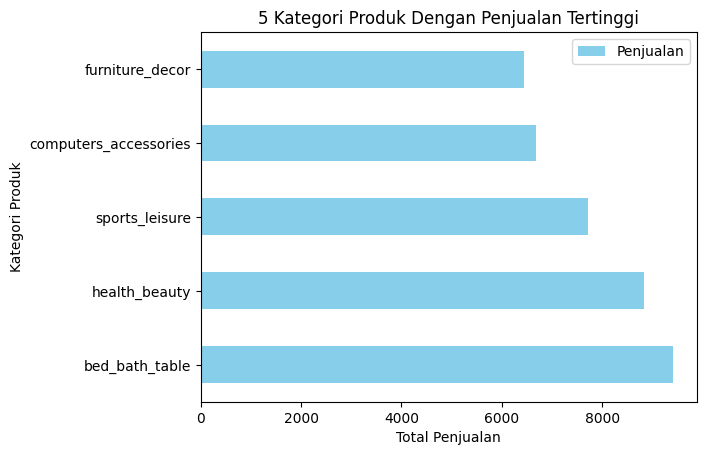

In [222]:
plt.figure(figsize=(20, 6))

# Plot chart
plot_highest_order = result_order_product_highest_order.plot(kind='barh', y='order_id', color='skyblue', legend=False)

# Tambah label dan judul
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')
plt.title('5 Kategori Produk Dengan Penjualan Tertinggi')
plot_highest_order.legend(["Penjualan"], loc="upper right")

# Menampilkan Plot
plt.show()

In [223]:
result_order_product_lowest_order = all_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="order_id", ascending=True)
result_order_product_lowest_order = result_order_product_lowest_order.head(5)
print(result_order_product_lowest_order)


                               order_id    price
product_category_name_english                   
security_and_services                 2   283.29
fashion_childrens_clothes             8   569.85
cds_dvds_musicals                    12   730.00
la_cuisine                           13  2054.99
arts_and_craftmanship                23  1814.01


<Figure size 2000x600 with 0 Axes>

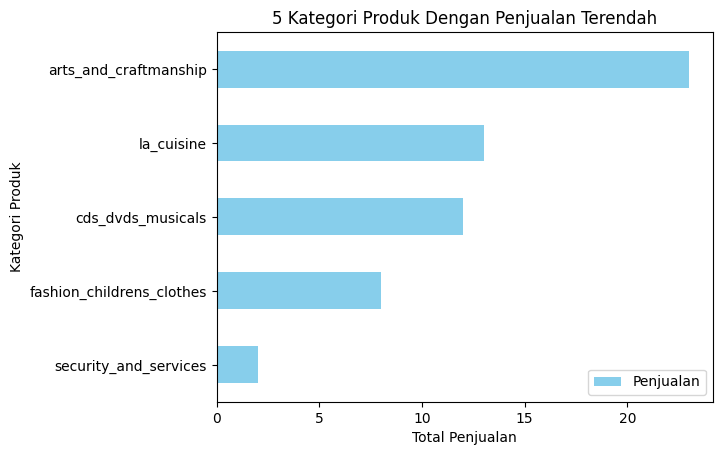

In [224]:
plt.figure(figsize=(20, 6))

# Plot chart
plot_lowest_order = result_order_product_lowest_order.plot(kind='barh', y='order_id', color='skyblue', legend=False)

# Tambah label dan judul
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')
plt.title('5 Kategori Produk Dengan Penjualan Terendah')
plot_lowest_order.legend(["Penjualan"], loc="lower right")

# Menampilkan Plot
plt.show()

## Conclusion

- Bisa dilihat untuk pertanyaan satu, distribusi di visualisasi tidak merata untuk pembagian per state dengan Sau Paulo memiliki jumlah customer terbanyak
- Performa penjualan bisa dilihat di visualisasi dengan penjualan terbanyak pada 11/2017
- Kategori produk yang menghasilkan penghasilan terbanyak yakni adalah health_beauty dan yang menghasilkan paling sedikit adalah security_and_services
- Kategori produk dengan penjualan terbanyak adalah bed_bath_table dan penjualan paling sedikit adalah security_and_services